# Clustering - Part I

*In this tutorial we do some hands-on experiments on **clustering methods, namely K-Means and Gaussian Mixture models**. Here we strongly follow the code examples of **Aurelion Geron "Hand-on Machine Learning with Scikit-Learn, Keras, and TensorFlow"**, which can be found at https://github.com/ageron/handson-ml2 with notebook **08_dimensionality_reduction.ipynb**.* 

*Clustering is mostly used for:*
*    *data analysis*
*    *customer segmentation* 
*    *as part of recommendation systems* 
*    *dimensionality reduction technique*
*    *anomaly detection*
*    *search engines*
*    *segment an image*

# Preamble

In [1]:
# Common imports
import numpy as np # numpy is THE toolbox for scientific computing with python
import pandas as pd # pandas provides THE data structure and data analysis tools for data scientists 
import pickle # we have to import a pickle file
import os 

# maximum number of columns
pd.set_option("display.max_rows", 101)
pd.set_option("display.max_columns", 101)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# K-Means in Python

We first of all create an artificial data set with **make_blobs**. Our dataset has only two features, but in real-life models datasets can have hundreds of features. 

Think of customer segmentation. What could be possible features? 

*    Age of the customer
*    How much customer spends on products
*    customer life-time value 
*    What did customer buy in last week?
*    Favorite product familiy of customer
*    ...

In [2]:
from sklearn.datasets import make_blobs

In [3]:
# features: 2 dimensional 

In [4]:
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])

# standard deviation of the blobs
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

In [5]:
# make a feature matrix (X) and the labels (y)
X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

In [6]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], s=2)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)
    plt.title('Artificial dataset created with make_blobs')

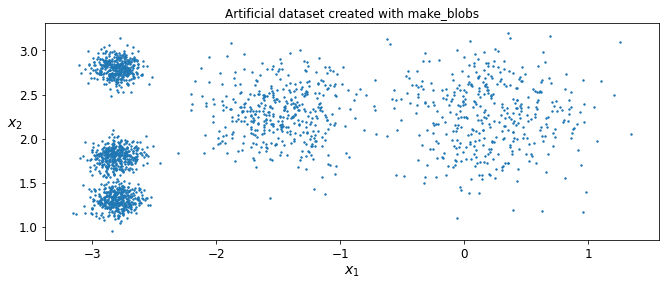

In [7]:
plt.figure(figsize=(11, 4))
plot_clusters(X)
plt.show()

How many clusters can we visually inspect? Three nicely separated clusters and two clusters, which are not perfectly separated.

## Fit and Predict

K-Means clustering is a **centroid-based clustering approach**. It consists of three main steps: initialization, assignment, and update step.

In the **initialization step**, the nmber of clusters are assumed and the centroid of each cluster is randomly defined. 

In the **assignment step** the clusters are formed by connecting each data record with its nearest centriod. In the **update step** a more accurate centroid of each cluster is calculated as the mean point of its included data records.

Let us apply the KMeans algorithm to the dataset:

In [8]:
from sklearn.cluster import KMeans

In [9]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
# n_clusters: number of cluster
y_pred = kmeans.fit_predict(X)

Each data point is assigned to one of the 5 clusters:

In [10]:
y_pred is kmeans.labels_

True

In [11]:
kmeans.labels_

array([4, 1, 0, ..., 3, 0, 1])

In [13]:
# Let us compare cluster centers with blob centers:
print(kmeans.cluster_centers_)
print(blob_centers)

[[ 0.20876306  2.25551336]
 [-2.80389616  1.80117999]
 [-1.46679593  2.28585348]
 [-2.79290307  2.79641063]
 [-2.80037642  1.30082566]]
[[ 0.2  2.3]
 [-1.5  2.3]
 [-2.8  1.8]
 [-2.8  2.8]
 [-2.8  1.3]]


In [14]:
# new predictions:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([0, 0, 3, 3])

## Decision Boundaries

In [15]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=13, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=15, linewidths=15,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

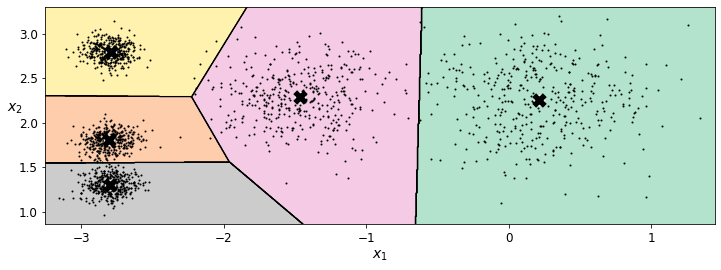

In [16]:
plt.figure(figsize=(12, 4))
plot_decision_boundaries(kmeans, X)
plt.show()

Not bad! Some of the instances near the edges are probably assigned to the wrong cluster, but overall it looks pretty good.

selecting a metric

RMSE: sqrt((y - y_pred)**2)

### Hard Clustering _vs_ Soft Clustering

Rather than arbitrarily choosing the closest cluster for each instance, which is called _hard clustering_, it might be better measure the distance of each instance to all 5 centroids. This is what the `transform()` method does:

In [17]:
kmeans.transform(X_new)

array([[0.32995317, 2.81093633, 1.49439034, 2.9042344 , 2.88633901],
       [2.80290755, 5.80730058, 4.4759332 , 5.84739223, 5.84236351],
       [3.29399768, 1.21475352, 1.69136631, 0.29040966, 1.71086031],
       [3.21806371, 0.72581411, 1.54808703, 0.36159148, 1.21567622]])

You can verify that this is indeed the Euclidian distance between each instance and each centroid:

In [18]:
np.linalg.norm(np.tile(X_new, (1, k)).reshape(-1, k, 2) - kmeans.cluster_centers_, axis=2)

array([[0.32995317, 2.81093633, 1.49439034, 2.9042344 , 2.88633901],
       [2.80290755, 5.80730058, 4.4759332 , 5.84739223, 5.84236351],
       [3.29399768, 1.21475352, 1.69136631, 0.29040966, 1.71086031],
       [3.21806371, 0.72581411, 1.54808703, 0.36159148, 1.21567622]])

## Metric for KMeans Clustering: Inertia

To select the best model, we will need a way to evaluate its performance. Unfortunately, clustering is an unsupervised task, so we do not have the comparison with targets. But at least we can **measure the mean squared distance between each instance and its closest centroid**. This is the idea behind the _inertia_ metric:

In [19]:
kmeans.inertia_

211.5985372581684

The `score()` method returns the negative inertia. Why negative? Well, it is because a predictor's `score()` method must always respect the *great is better* rule.

In [20]:
kmeans.score(X)

-211.59853725816856

## Multiple Initializations

When you set the `n_init` hyperparameter, Scikit-Learn runs the original algorithm `n_init` times, and selects the solution that minimizes the inertia. By default, Scikit-Learn sets `n_init=10`. Take a close look at: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html. 

In [21]:
kmeans_rnd_10_inits = KMeans(n_clusters=5, init="random", n_init=10,
                              algorithm="full", random_state=11)
kmeans_rnd_10_inits.fit(X)

KMeans(algorithm='full', copy_x=True, init='random', max_iter=300, n_clusters=5,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=11,
       tol=0.0001, verbose=0)

As you can see, we end up with the initial model, which is certainly the optimal K-Means solution (at least in terms of inertia, and assuming $k=5$).

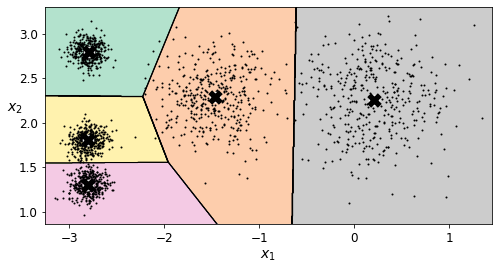

In [22]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans_rnd_10_inits, X)
plt.show()

## Finding the optimal number of clusters

What if the number of clusters is set to a lower or greater value than 5?

In [23]:
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)

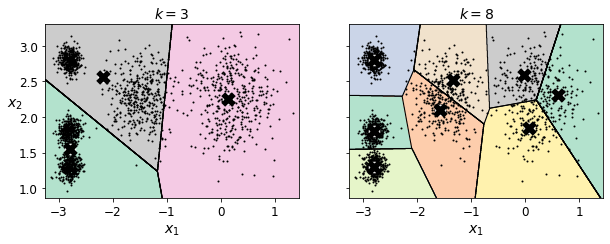

In [24]:
kmeans_k3 = KMeans(n_clusters=3, random_state=42)
kmeans_k8 = KMeans(n_clusters=8, random_state=42)

plot_clusterer_comparison(kmeans_k3, kmeans_k8, X, "$k=3$", "$k=8$")
plt.show()

These two models don't look great. What about their inertias?

In [25]:
kmeans_k3.inertia_

653.2167190021553

In [26]:
kmeans_k8.inertia_

118.41983763508077

### Elbow Method

No, **we cannot simply take the value of $k$ that minimizes the inertia**, since it keeps getting lower as we increase $k$. Indeed, the more clusters there are, the closer each instance will be to its closest centroid, and therefore the lower the inertia will be. However, we can plot the inertia as a function of $k$ and analyze the resulting curve:

In [27]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

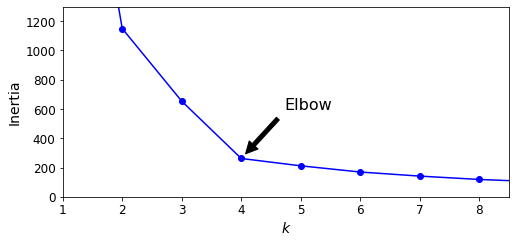

In [28]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(4, inertias[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 8.5, 0, 1300])
plt.show()

As you can see, there is an elbow at $k=4$, which means that less clusters than that would be bad, and more clusters would not help much and might cut clusters in half. So $k=4$ is a pretty good choice. Of course in this example it is not perfect since it means that the two blobs in the lower left will be considered as just a single cluster, but it's a pretty good clustering nonetheless.

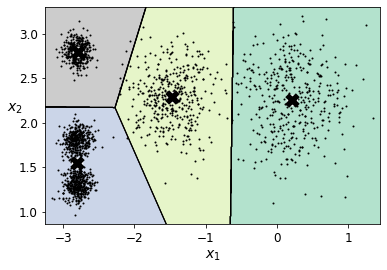

In [29]:
plot_decision_boundaries(kmeans_per_k[4-1], X)
plt.show()

### Silhouette Diagram

Another approach is to look at the **silhouette score**, which is the mean **silhouette coefficient** over all the instances. An instance's silhouette coefficient is equal to 

$$\frac{(b - a)}{\max(a, b)}$$ 

where 

*    $a$ is the mean distance to the other instances in the same cluster (it is the *mean intra-cluster distance*), and 
*    $b$ is the *mean nearest-cluster distance*, that is the mean distance to the instances of the next closest cluster (defined as the one that minimizes $b$, excluding the instance's own cluster). 

The silhouette coefficient can vary between -1 and +1: 

*    a coefficient close to +1 means that the instance is well inside its own cluster and far from other clusters, 
*    a coefficient close to 0 means that it is close to a cluster boundary, 
*    a coefficient close to -1 means that the instance may have been assigned to the wrong cluster.

In [30]:
from sklearn.metrics import silhouette_score

In [31]:
silhouette_score(X, kmeans.labels_)

0.655517642572828

In [32]:
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

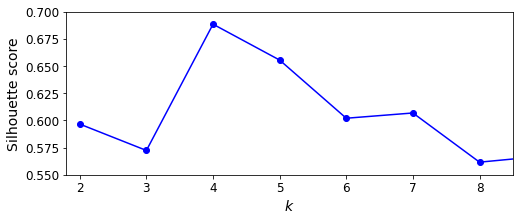

In [33]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 8.5, 0.55, 0.7])
plt.show()

As you can see, this visualization is much richer than the previous one: in particular, although it confirms that $k=4$ is a very good choice, but it also underlines the fact that $k=5$ is quite good as well.

An even more informative visualization is given when you plot every instance's silhouette coefficient, sorted by the cluster they are assigned to and by the value of the coefficient. This is called a _silhouette diagram_:

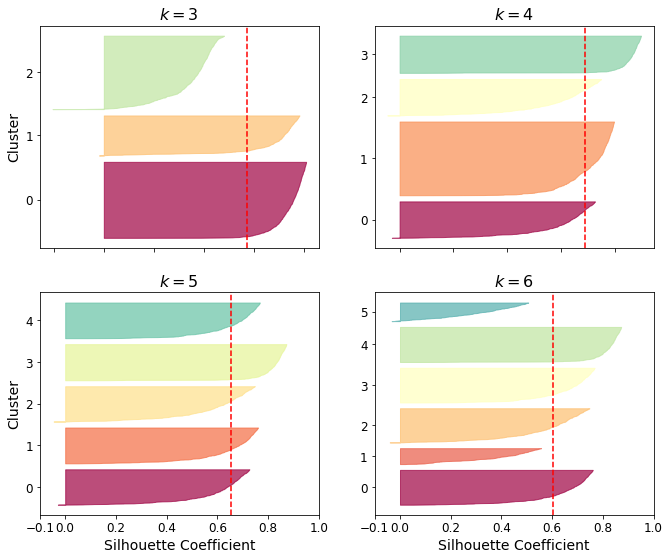

In [34]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()

Each diagram contains
one knife shape per cluster. The shape’s height indicates the number of instances
the cluster contains, and its width represents the sorted silhouette coefficients of the
instances in the cluster (wider is better). The dashed line indicates the mean silhouette
coefficient.

## Limits of K-Means

In [35]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

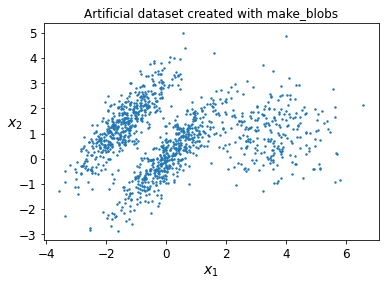

In [36]:
plot_clusters(X)

clusters of different shape do not work well on Kmeans

In [37]:
kmeans_good = KMeans(n_clusters=3, init=np.array([[-1.5, 2.5], [0.5, 0], [4, 0]]), n_init=1, random_state=42)
kmeans_bad  = KMeans(n_clusters=3, random_state=42)
kmeans_good.fit(X)
kmeans_bad.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

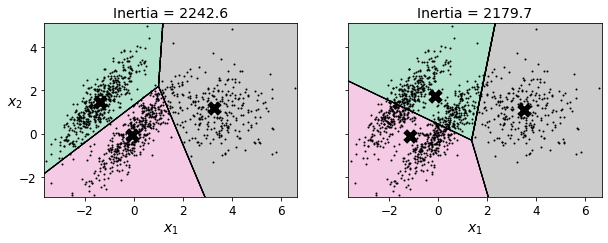

In [38]:
plt.figure(figsize=(10, 3.2))

plt.subplot(121)
plot_decision_boundaries(kmeans_good, X)
plt.title("Inertia = {:.1f}".format(kmeans_good.inertia_), fontsize=14)

plt.subplot(122)
plot_decision_boundaries(kmeans_bad, X, show_ylabels=False)
plt.title("Inertia = {:.1f}".format(kmeans_bad.inertia_), fontsize=14)

plt.show()

K-Means does not behave very well when the clusters have varying sizes, different densities, or nonspherical shapes. Here we see how KMeans clusters a dataset containing three ellipsoidal clusters of different dimensions,
densities, and orientations.

The solution on the right is just terrible, even though its inertia is lower. So, depending on the data, different clustering algorithms may perform better. **On these types of elliptical clusters, Gaussian mixture models work great.**

# Gaussian Mixture Models Clustering

In Gaussian mixture models (GMM) clustering, each cluster is considered as a **probabilistic generative model**. A data record has a probability for belonging to each cluster and it is assigned to the cluster returning the highest probability. 

A Gaussian mixture model (GMM) is a probabilistic model that assumes that the
instances were generated from a mixture of several Gaussian distributions whose
parameters are unknown.

Each cluster follows a Gaussian distribution with two parameters, which are the cluster's mean and standard deviation.

Gaussian distribution:
    
\begin{equation} \mathcal{N}(x; \mu, \sigma) = \frac{e^{−(x−\mu)^2/(2\sigma^2)}}{\sigma \sqrt{2π}}
\end{equation}

The task in GMM clustering is to find the optimum value of both $\mu$ and $\sigma$ which maximize the overall probability of the data record to be in their assigned clusters. To achieve this outcome, the expectation maximization algorithm is implemented.

## Generate data (make_blobs)

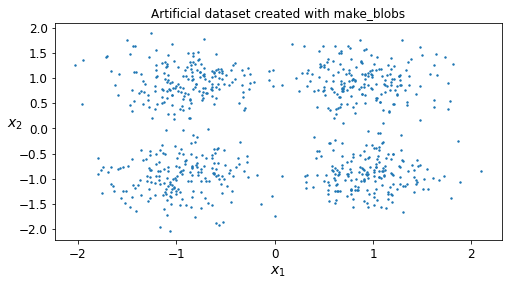

In [46]:
from sklearn.preprocessing import StandardScaler
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1], [-1,1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4, random_state=0)
# Scale and standardize the dataset
X = StandardScaler().fit_transform(X)
plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.show()

## Fit

In [47]:
from sklearn.mixture import GaussianMixture

In [48]:
gm = GaussianMixture(n_components = 3, n_init = 10)
gm.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=10,
                precisions_init=None, random_state=None, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

The parameters, which the algorithm estimates, are:
    
*    gm.weights_
*    gm.means_
*    gm.covariances_

In [49]:
gm.weights_

array([0.25042415, 0.25244063, 0.49713522])

In [50]:
gm.means_

array([[ 0.96007156, -0.90546578],
       [-0.96087374, -0.94889446],
       [ 0.00430158,  0.93795409]])

In [51]:
gm.covariances_ 

array([[[ 0.11516669,  0.00137301],
        [ 0.00137301,  0.12057364]],

       [[ 0.13633388,  0.00978385],
        [ 0.00978385,  0.15859315]],

       [[ 0.95112311, -0.00152283],
        [-0.00152283,  0.12028907]]])

In [53]:
print('Algorithm converged?', gm.converged_)
print('Iterations until convergence: ', gm.n_iter_)

Algorithm converged? True
Iterations until convergence:  5


In [55]:
gm.predict(X)[:10]

array([2, 1, 2, 2, 2, 0, 0, 2, 2, 2], dtype=int64)

In [56]:
# Soft clustering: estimate the probability that an instance belongs to a certain cluster:
gm.predict_proba(X)[0]

array([1.87133724e-07, 3.19423121e-10, 9.99999813e-01])

A Gaussian mixture model is a *generative model*, meaning that one can sample instance from it

In [57]:
X_new, y_new = gm.sample(6)

In [58]:
X_new

array([[-0.25944983, -1.35111048],
       [-1.05878403, -0.73657133],
       [-1.69237083,  0.578017  ],
       [-0.01766174,  1.07683596],
       [ 0.79907571,  0.34574588],
       [-1.2568653 ,  0.68943954]])

It is also possible to estimate the density of the model at any given location. This is achieved using the `score_samples()` method. It estimates the log of the *probability density function (PDF)*. The greater the score, the higher the density.

In [60]:
gm.score_samples(X)[:10]

array([-1.83643525, -1.39325471, -1.94728326, -3.20613137, -3.23074407,
       -3.97708979, -1.15455056, -2.26272912, -3.07881851, -2.30980776])

Here we show the countour plot of this model. We show the decision boundaries (dashed lines) and the density contour of this model.

In [61]:
from matplotlib.colors import LogNorm

def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')
    
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    plot_centroids(clusterer.means_, clusterer.weights_)

    plt.xlabel("$x_1$", fontsize=14)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

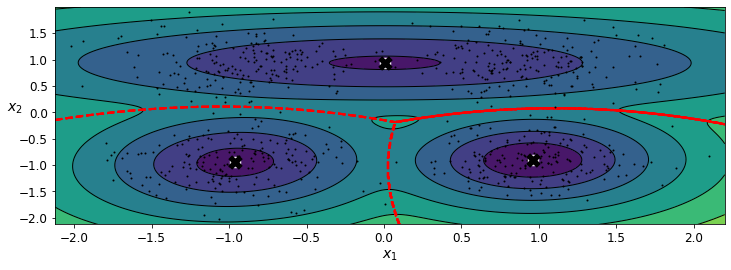

In [62]:
plt.figure(figsize=(12, 4))
plot_gaussian_mixture(gm, X)
plt.show()

An important parameter for Gaussian mixture models is constraining the covariance matrices. This is the `covariance_type` hyperparameter:

*    spherical
*    diag
*    tied

## Anomaly Detection unsing Gaussian Mixtures

Gaussian Mixtures can be used for **anomaly detection**: instances located in low-density regions can be considered anomalies. You must define what density threshold you want to use. For example, in a manufacturing company that tries to detect defective products, the ratio of defective products is usually well-known. Say it is equal to 4%, then you can set the density threshold to be the value that results in having 4% of the instances located in areas below that threshold density:

In [65]:
densities = gm.score_samples(X)
density_threshold = np.percentile(densities, 4)
print('Density threshold at 4%: ', density_threshold)
anomalies = X[densities < density_threshold]

Density threshold at 4%:  -4.0946964919777855


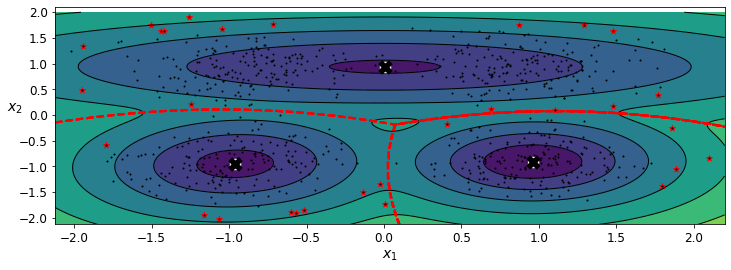

In [66]:
plt.figure(figsize=(12, 4))

plot_gaussian_mixture(gm, X)
plt.scatter(anomalies[:, 0], anomalies[:, 1], color='r', marker='*')
plt.ylim(top=2.1)
plt.show()

## Model Selection

We **cannot use the inertia or the silhouette score because they both assume that the clusters are spherical**. Instead, we can try to find the model that minimizes a theoretical information criterion such as the Bayesian Information Criterion (BIC) or the Akaike Information Criterion (AIC):

${BIC} = {\log(m)p - 2\log({\hat L})}$

${AIC} = 2p - 2\log(\hat L)$

* $m$ is the number of instances.
* $p$ is the number of parameters learned by the model.
* $\hat L$ is the maximized value of the likelihood function of the model. This is the conditional probability of the observed data $\mathbf{X}$, given the model and its optimized parameters.

Both BIC and AIC penalize models that have more parameters to learn (e.g., more clusters), and reward models that fit the data well (i.e., models that give a high likelihood to the observed data).

In [67]:
gm.bic(X)

3566.2924556104963

In [68]:
gm.aic(X)

3487.7512110994803

How are they computed exactly:

In [69]:
n_clusters = 3
n_dims = 2
n_params_for_weights = n_clusters - 1
n_params_for_means = n_clusters * n_dims
n_params_for_covariance = n_clusters * n_dims * (n_dims + 1) // 2
n_params = n_params_for_weights + n_params_for_means + n_params_for_covariance
max_log_likelihood = gm.score(X) * len(X) # log(L^)
bic = np.log(len(X)) * n_params - 2 * max_log_likelihood
aic = 2 * n_params - 2 * max_log_likelihood

In [70]:
bic, aic

(3566.2924556104963, 3487.7512110994803)

In [71]:
gms_per_k = [GaussianMixture(n_components=k, n_init=10, random_state=42).fit(X)
             for k in range(1, 11)]

In [72]:
bics = [model.bic(X) for model in gms_per_k]
aics = [model.aic(X) for model in gms_per_k]

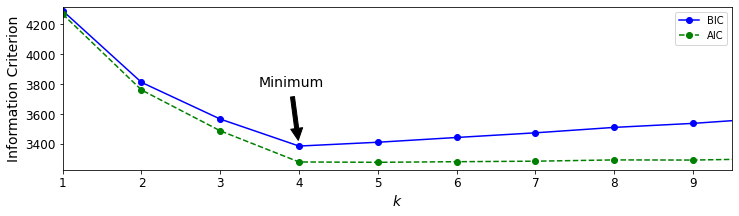

In [75]:
plt.figure(figsize=(12, 3))
plt.plot(range(1, 11), bics, "bo-", label="BIC")
plt.plot(range(1, 11), aics, "go--", label="AIC")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Information Criterion", fontsize=14)
plt.axis([1, 9.5, np.min(aics) - 50, np.max(aics) + 50])
plt.annotate('Minimum',
             xy=(4, bics[3]),
             xytext=(0.35, 0.6),
             textcoords='figure fraction',
             fontsize=14,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.legend()
plt.show()

Find the best covariance type:

In [76]:
min_bic = np.infty

for k in range(1, 11):
    for covariance_type in ("full", "tied", "spherical", "diag"):
        bic = GaussianMixture(n_components=k, n_init=10,
                              covariance_type=covariance_type,
                              random_state=42).fit(X).bic(X)
        if bic < min_bic:
            min_bic = bic
            best_k = k
            best_covariance_type = covariance_type

In [131]:
best_k

3

In [77]:
best_covariance_type

'tied'

## Expectation-Maximization Algorithm

to do 